In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content


In [ ]:
rimOne_dir = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly'
train_glaucoma_dir = rimOne_dir + "/training_set/glaucoma"
train_normal_dir = rimOne_dir + "/training_set/normal"
test_glaucoma_dir = rimOne_dir + "/test_set/glaucoma"
test_normal_dir = rimOne_dir + "/test_set/normal"
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")


Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


<ipython-input-10-5215e82255ff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


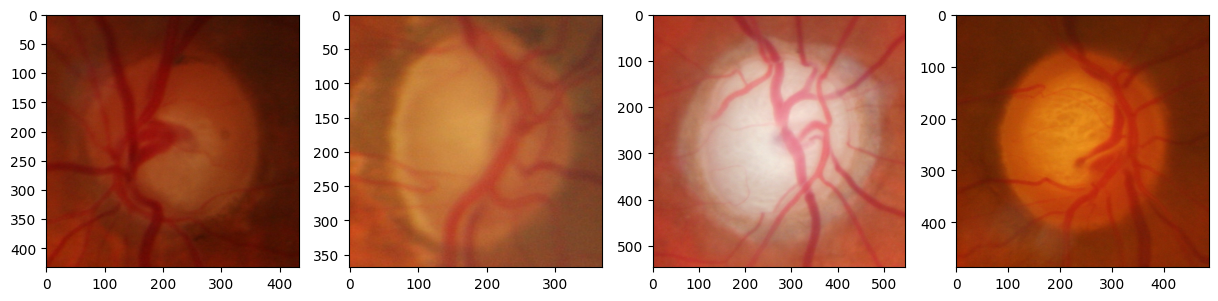


Sample Rim-One normal images:


<ipython-input-10-5215e82255ff>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


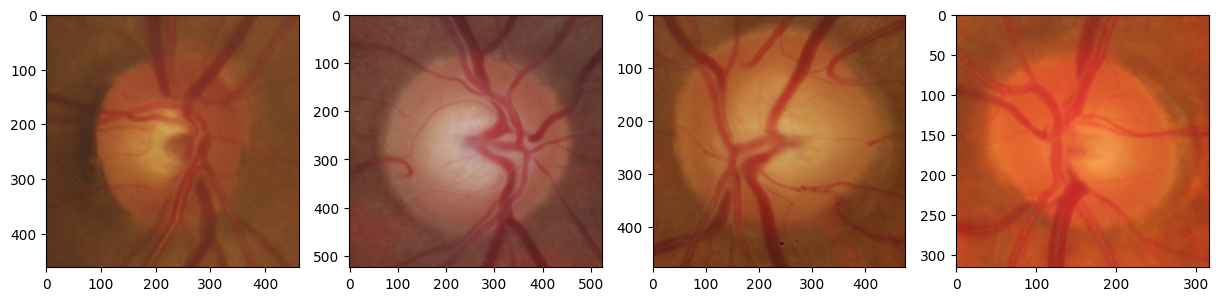

In [ ]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

In [ ]:
dristhi_dir = "/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS"
train_glaucoma_dir = dristhi_dir + "/Training/Images/GLAUCOMA"
train_normal_dir = dristhi_dir + "/Training/Images/NORMAL"
test_glaucoma_dir = dristhi_dir + "/Test/Images/glaucoma"
test_normal_dir = dristhi_dir + "/Test/Images/normal"
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")


Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


Sample Dristhi glaucoma images:


<ipython-input-12-567d2ce37237>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


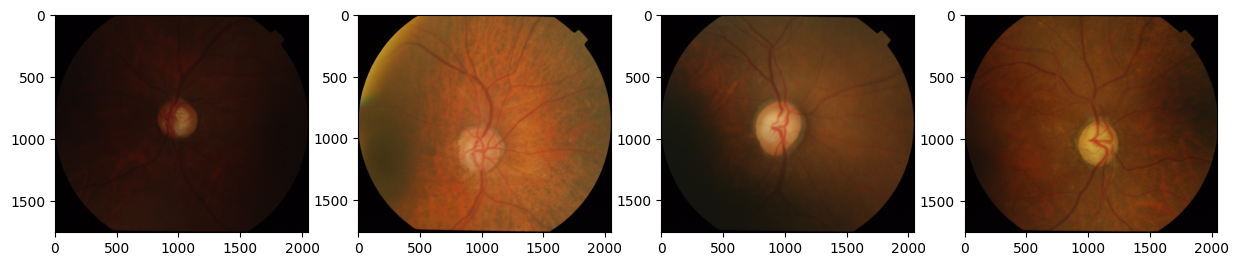


Sample Dristhi normal images:


<ipython-input-12-567d2ce37237>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


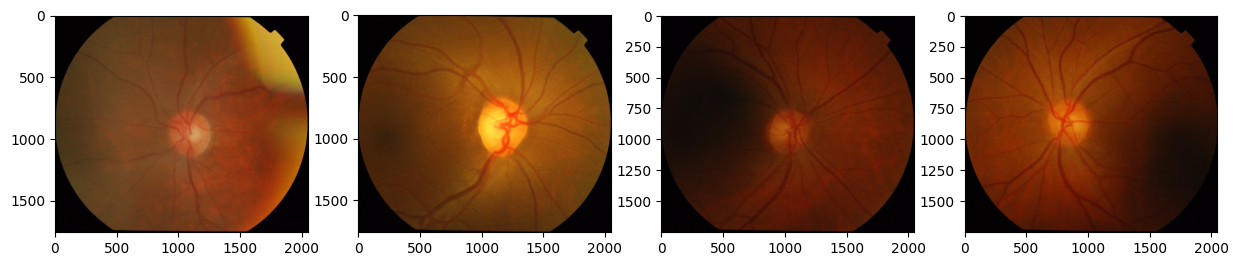

In [ ]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()

In [ ]:
acrima_dir = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/ACRIMA/Images'
glaucoma_dir = acrima_dir + "/glaucoma"
normal_dir = acrima_dir + "/normal"

normal_images = os.listdir(normal_dir)
glaucoma_images = os.listdir(glaucoma_dir)

# Look at the number of samples in each dataset
print("Acrima dataset contains : ")
print(f"\t{len(glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(normal_images)} images representing a normal eye")

Acrima dataset contains : 
	396 images representing an eye with glaucoma
	309 images representing a normal eye


Sample glaucoma images:


<ipython-input-14-ea888e79ac72>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


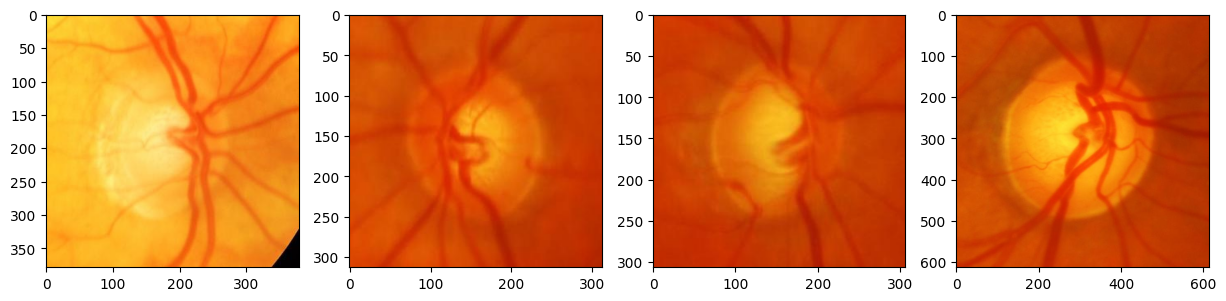


Sample normal images:


<ipython-input-14-ea888e79ac72>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


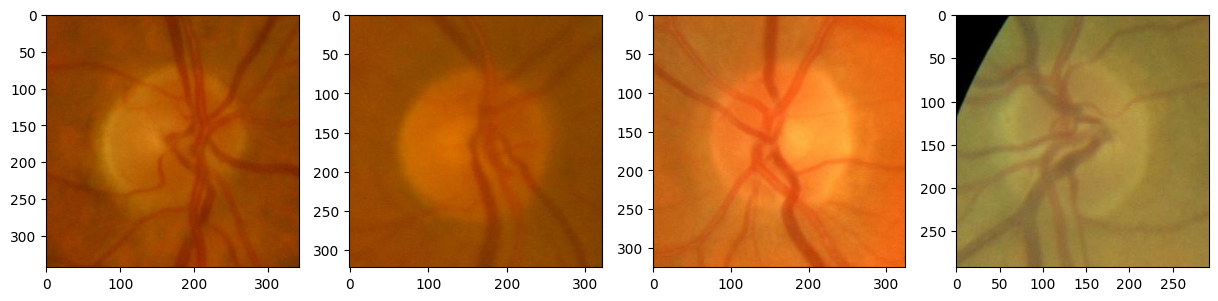

In [ ]:
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(glaucoma_dir, glaucoma_images[i - 1])}"))
plt.show()

print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(normal_dir, normal_images[i - 1])}"))
plt.show()

In [ ]:
os.mkdir('/content/drive/MyDrive/Glaucoma-Detection-Final/combine9')
## define your paths for glaucoma####
g_path1 = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/ACRIMA/Images/glaucoma'
g_path2 = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma'
g_path3 ='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma'
g_path4 ='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Training/Images/GLAUCOMA'
g_path5 ='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Test/Images/glaucoma'
g_dest='/content/drive/MyDrive/Glaucoma-Detection-Final/combine9/glaucoma'

os.mkdir(g_dest)
g_list=[g_path1,g_path2,g_path3,g_path4,g_path5]

for i in g_list:
  shutil.copytree(i, g_dest, dirs_exist_ok=True)
print(len(os.listdir('/content/drive/MyDrive/Glaucoma-Detection-Final/combine9/glaucoma')))

##################################################
#normal
n_path1='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/ACRIMA/Images/normal'
n_path2='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/training_set/normal'
n_path3='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/test_set/normal'
n_path4='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Training/Images/NORMAL'
n_path5='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Test/Images/normal'
n_dest='/content/drive/MyDrive/Glaucoma-Detection-Final/combine9/normal'
os.mkdir(n_dest)
n_list=[n_path1,n_path2,n_path3,n_path4,n_path5]

for i in n_list:
  shutil.copytree(i,n_dest, dirs_exist_ok=True)
print(len(os.listdir(n_dest)))

638
653


In [ ]:
import pathlib
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.4608150589999696
GPU (s):
0.10296383500008233
GPU speedup over CPU: 33x


Total images: 1289
Total number of classes: 2
Total glaucoma images: 638
Total normal images: 653


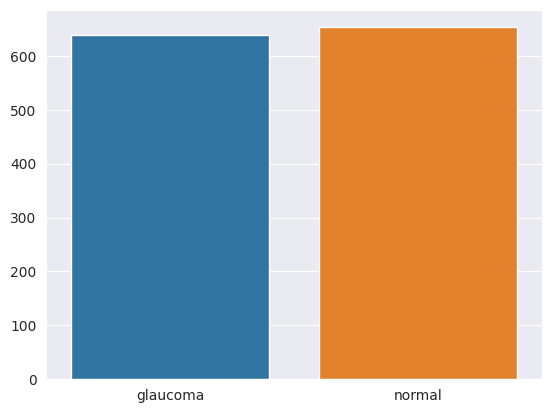

In [ ]:
base_dir = '/content/drive/MyDrive/Glaucoma-Detection-Final/combine9'
base_dir = pathlib.Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'/content/drive/MyDrive/Glaucoma-Detection-Final/combine9/glaucoma/')]
normal = [fn for fn in os.listdir(f'/content/drive/MyDrive/Glaucoma-Detection-Final/combine9/normal')]
data=[glaucoma,normal]
dataset_classes =['glaucoma','normal']

image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

In [ ]:
!pip install split-folders
import splitfolders #to split dataset
import pathlib
base_ds = '/content/drive/MyDrive/Glaucoma-Detection-Final/combine2'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=32
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 1291 files [00:05, 222.97 files/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='binary',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='binary',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='binary',
    shuffle=False)

Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import layers

base_model=tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(256,256,3),
)
for layer in base_model.layers:
  layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(1, activation = 'sigmoid')(x)

head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer=Adam(learning_rate=0.003), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
head_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_210 (Conv2D)         (None, 127, 127, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 127, 127, 32)         96        ['conv2d_210[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 127, 127, 32)         0         ['batch_normalization_18

In [ ]:
model_info=head_model.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 150,
validation_data = val_ds,
validation_steps = int(round(128/32)))

Epoch 1/150
32/32 [==============================] - 41s 1s/step - loss: 53.4323 - accuracy: 0.6200 - val_loss: 0.8947 - val_accuracy: 0.5078
Epoch 2/150
32/32 [==============================] - 35s 1s/step - loss: 0.9730 - accuracy: 0.5940 - val_loss: 0.6715 - val_accuracy: 0.6250
Epoch 3/150
32/32 [==============================] - 34s 939ms/step - loss: 0.6475 - accuracy: 0.6980 - val_loss: 0.6351 - val_accuracy: 0.7500
Epoch 4/150
32/32 [==============================] - 33s 1s/step - loss: 0.6146 - accuracy: 0.7300 - val_loss: 0.5969 - val_accuracy: 0.7500
Epoch 5/150
32/32 [==============================] - 35s 1s/step - loss: 0.5732 - accuracy: 0.7340 - val_loss: 0.6083 - val_accuracy: 0.7188
Epoch 6/150
32/32 [==============================] - 35s 1s/step - loss: 0.5376 - accuracy: 0.7890 - val_loss: 0.5737 - val_accuracy: 0.8047
Epoch 7/150
32/32 [==============================] - 32s 1s/step - loss: 0.5377 - accuracy: 0.7940 - val_loss: 0.6086 - val_accuracy: 0.7656
Epoch 8/1

In [ ]:
head_model.save('/content/drive/MyDrive/Glaucoma-Detection-Final/datasets/combine_model/combine_cnn.h9')

NameError: ignored

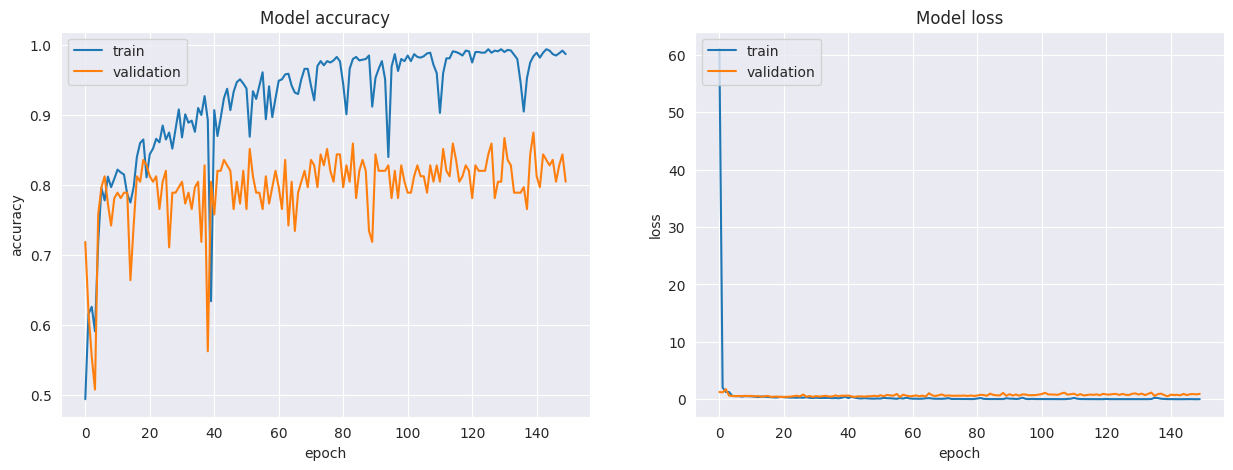

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(model_info)

In [ ]:
model=load_model('/content/drive/MyDrive/Glaucoma-Detection-Final/datasets/combine_model/combine_cnn.h9')
print("Glaucoma detection model loaded")

NameError: name 'load_model' is not defined

In [ ]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

In [ ]:
test_image = load_img('/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_by_hospital/test_set/glaucoma/r1_Im117.png', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 3s 3s/step
Glaucoma


In [ ]:
test_image = load_img('/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma/r2_Im287.png', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

NameError: name 'load_img' is not defined

In [ ]:
test_image = load_img('/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/test_set/normal/r1_Im022.png', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 28ms/step
Glaucoma


In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 4s 753ms/step - loss: 0.6278 - accuracy: 0.8626
Loss: 0.6278258562088013 Accuracy: 0.8625954389572144


In [ ]:
!nvidia-smi
